In [15]:

import warnings                     # For silencing non-critical warnings
import numpy as np                  # library fpr mathematical operatures
import pandas as pd                 # library for dataframes handling
import matplotlib.pyplot as plt     # library for plotting charts
import statsmodels.api as sm        #library for handling time series data
from statsmodels.tsa.seasonal import STL                      #Specific module for seasonal decomposition (trend/seasonal/residual)
from statsmodels.tsa.stattools import adfuller, kpss # Specific module for stationarity tests (ADF/KPSS)

from sklearn.preprocessing import StandardScaler, PolynomialFeatures #feature preprocessing

from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV, cross_val_score #For basic ML tasks
from sklearn.preprocessing import StandardScaler                # For feature scaling
from sklearn.feature_selection import SelectKBest, f_regression # For feature selection
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # For using regression metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # For using tree ensembles
from sklearn.linear_model import Ridge, LinearRegression                          # ML regression models

# Optional console tweaks
warnings.filterwarnings("ignore")       # hide unimportant warnings
pd.set_option("display.max_rows", None) # show full DataFrame rows when printing

In [16]:
!pip install download

In [17]:

from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [18]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind="zip")


Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [19]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')



In [ ]:
import pandas as pd
from google.colab import files

path = '/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')  # read everything

out_path = 'dingling_clean.csv'
df.to_csv(out_path, index=False, encoding='utf-8-sig')  # keep all columns
files.download(out_path)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:

def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [21]:
aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)


In [ ]:

aq_df.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [ ]:
df = df.ffill()

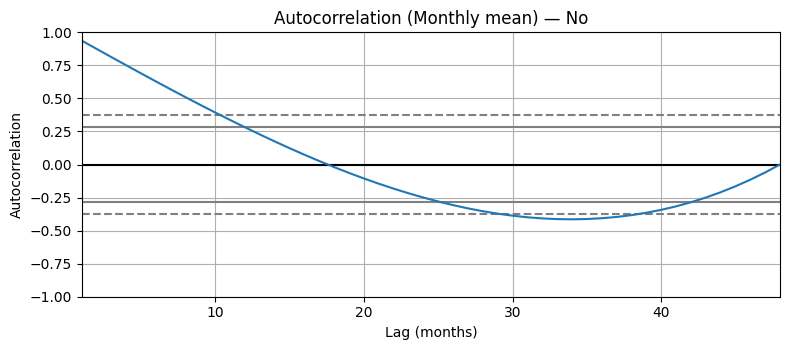

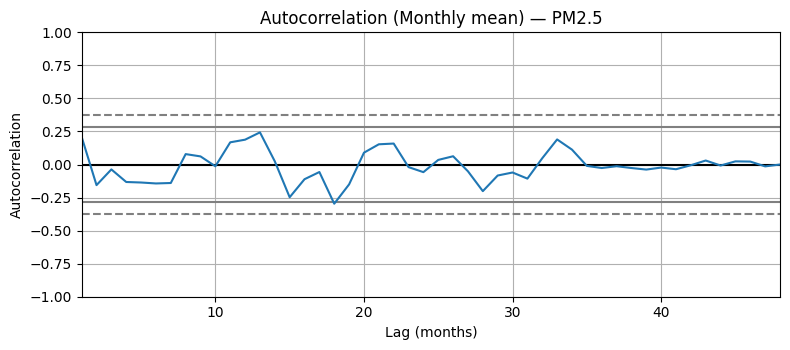

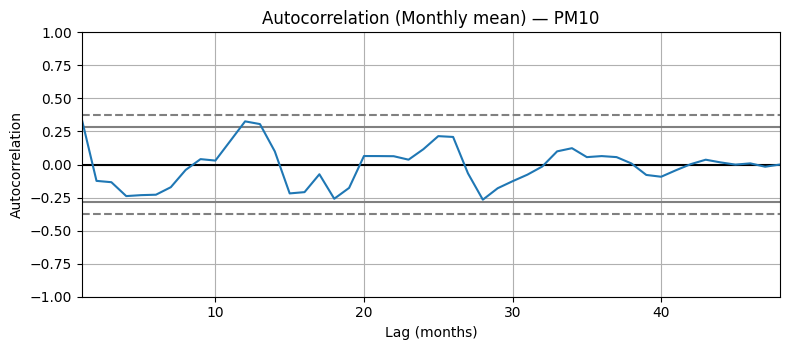

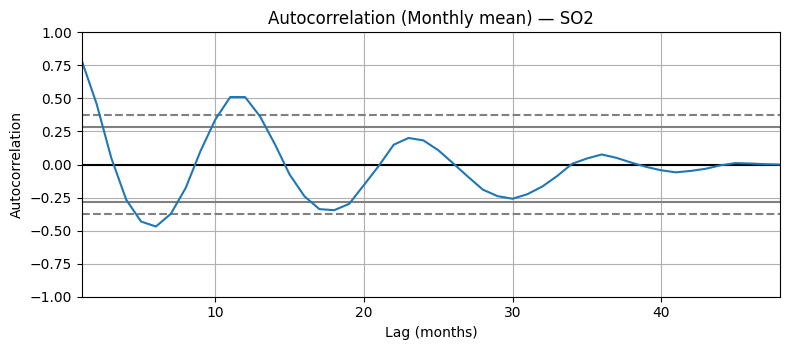

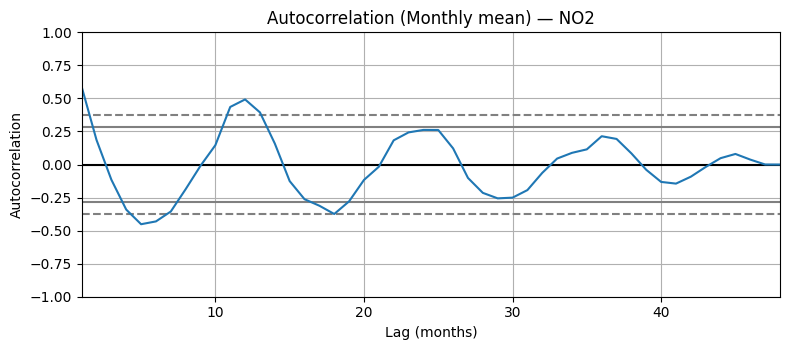

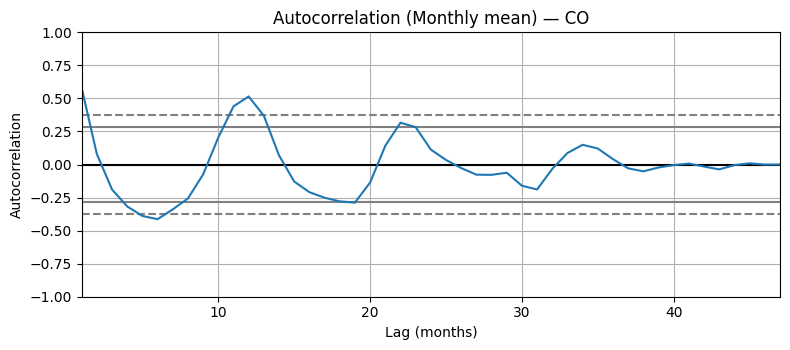

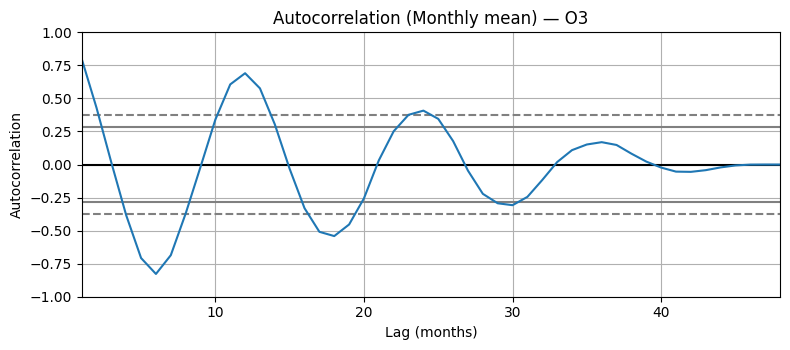

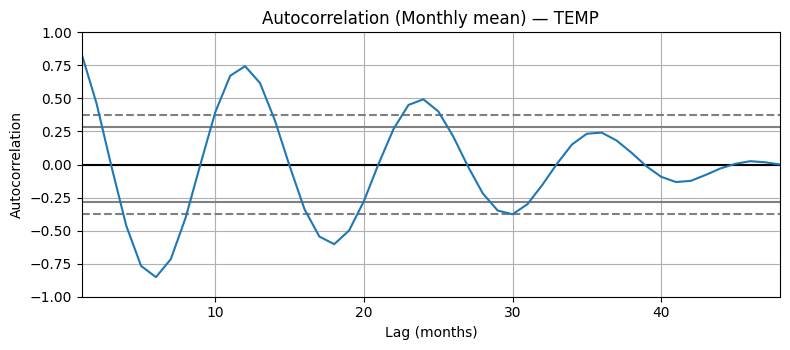

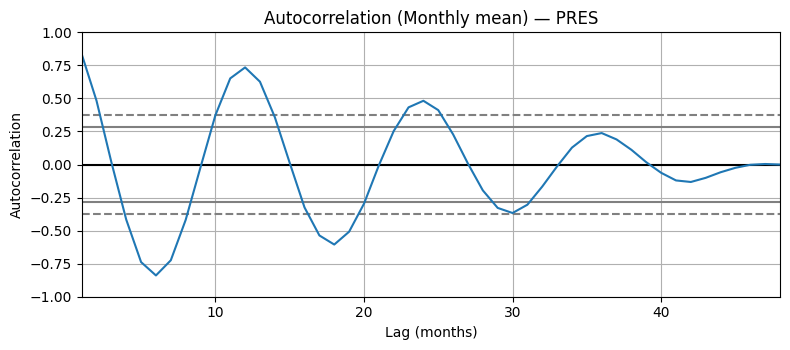

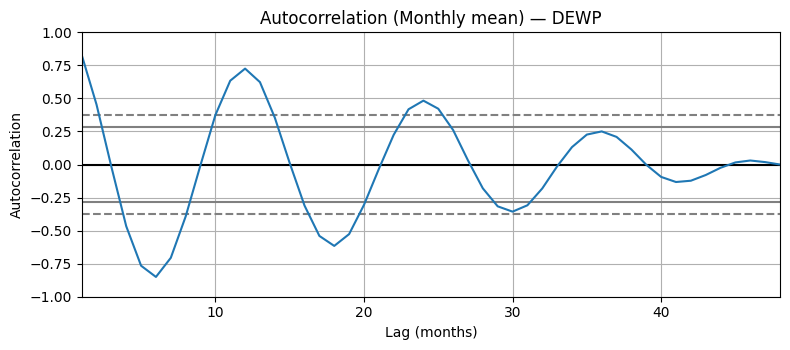

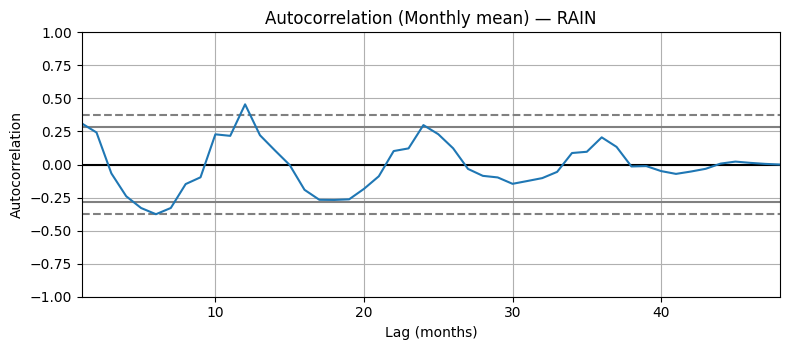

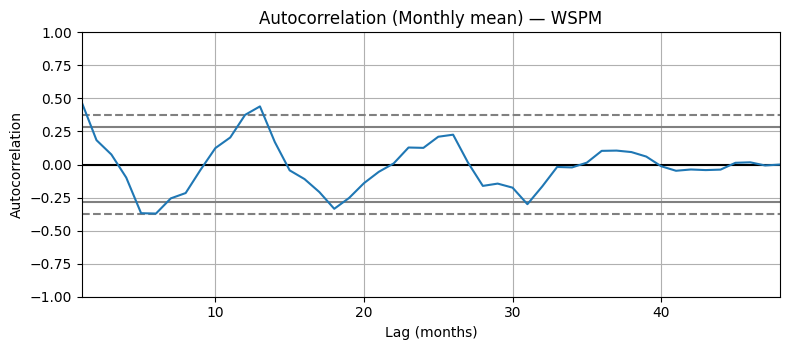

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype

# --- Ensure a DatetimeIndex (adjust the column name if yours differs) ---
TIME_COL = "year_month_day_hour"  # <-- change if needed
aq_df = aq_df.copy()
if TIME_COL in aq_df.columns:
    aq_df[TIME_COL] = pd.to_datetime(aq_df[TIME_COL], errors="coerce")
    aq_df = aq_df.dropna(subset=[TIME_COL]).set_index(TIME_COL).sort_index()
# If it's already a DatetimeIndex, this does nothing.

# --- Monthly resample: use "1M" (month-end). For month-start use "MS". ---
aq_m = aq_df.resample("1M").mean(numeric_only=True)

# --- Plot autocorrelation for EVERY numeric column ---
for col in aq_m.columns:
    if not is_numeric_dtype(aq_m[col]):
        continue
    s = aq_m[col].dropna()
    if len(s) < 3:
        continue

    plt.figure(figsize=(8, 3.6))
    pd.plotting.autocorrelation_plot(s)
    plt.title(f"Autocorrelation (Monthly mean) — {col}", fontsize=12)
    plt.xlabel("Lag (months)")      # lags correspond to months after monthly resample
    plt.ylabel("Autocorrelation")
    plt.tight_layout()
    plt.show()


In [ ]:
aq_df = aq_df.ffill()
df = aq_df

Saving dingling_clean (2).csv to dingling_clean (2).csv


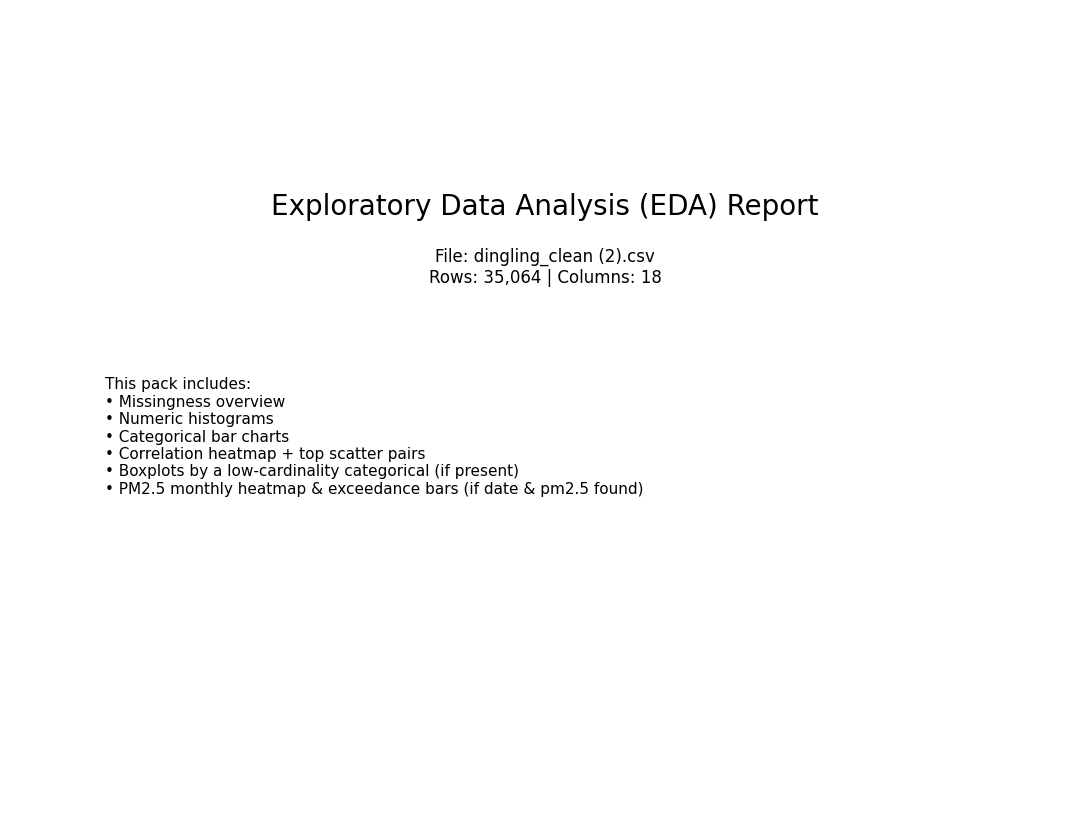

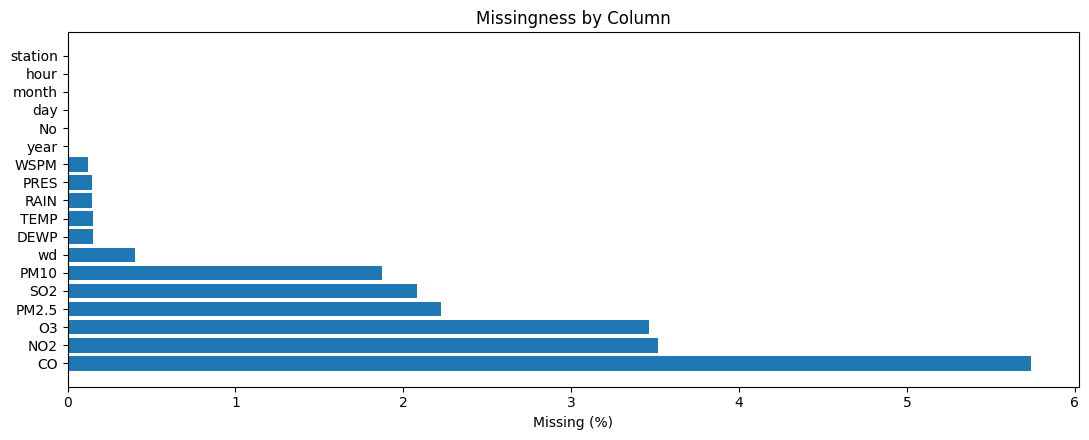

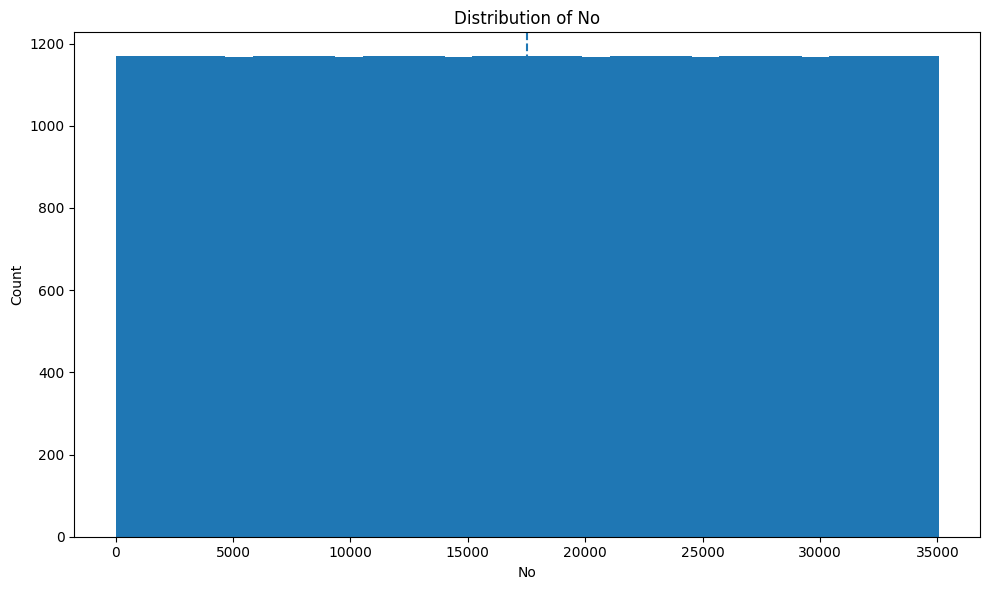

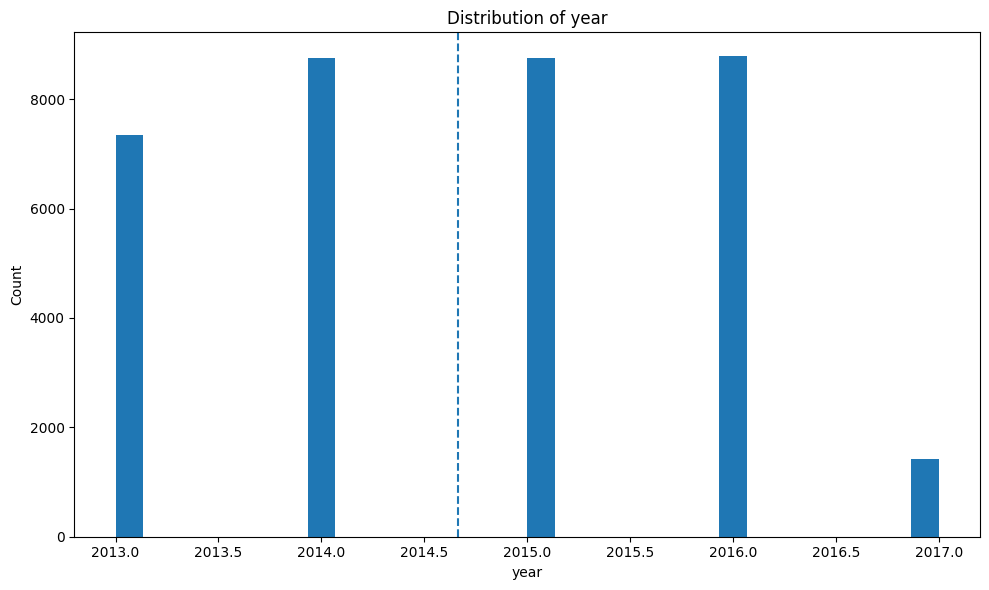

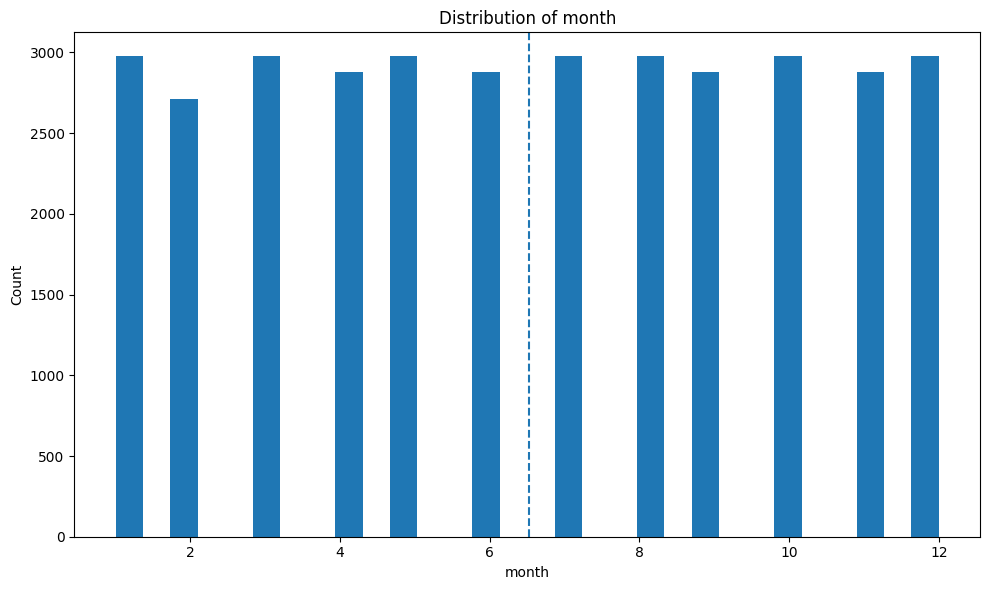

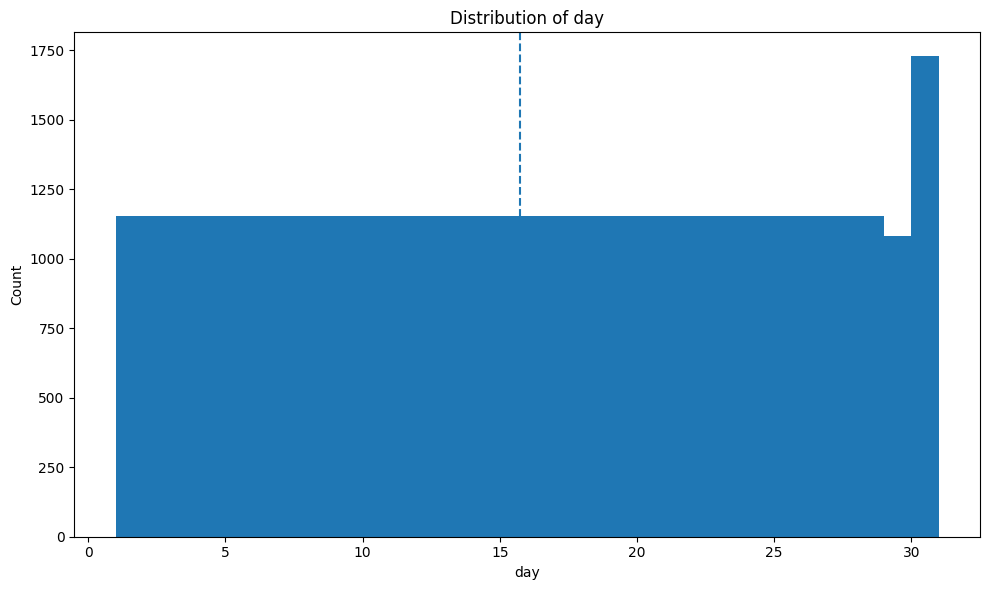

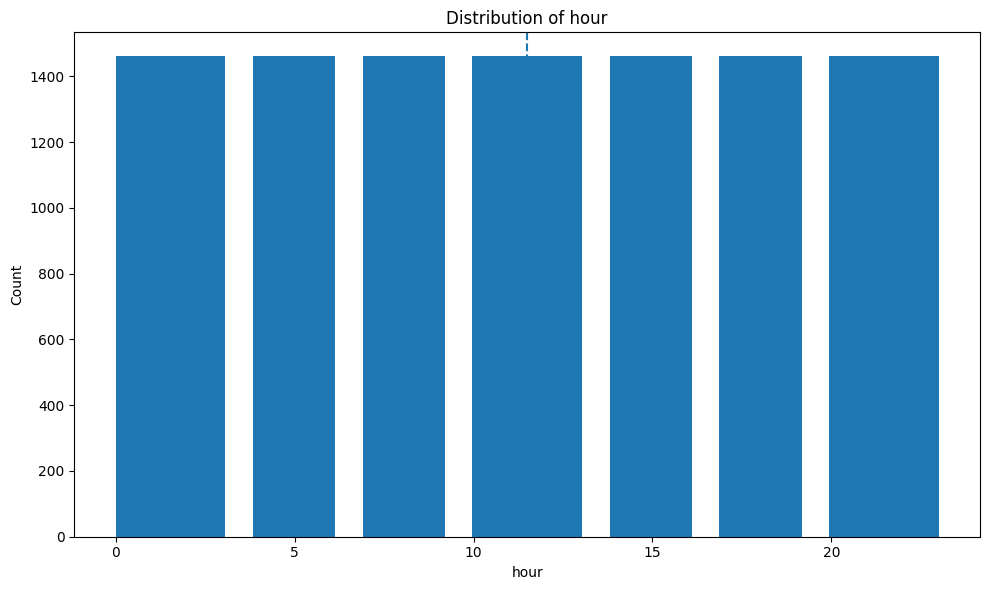

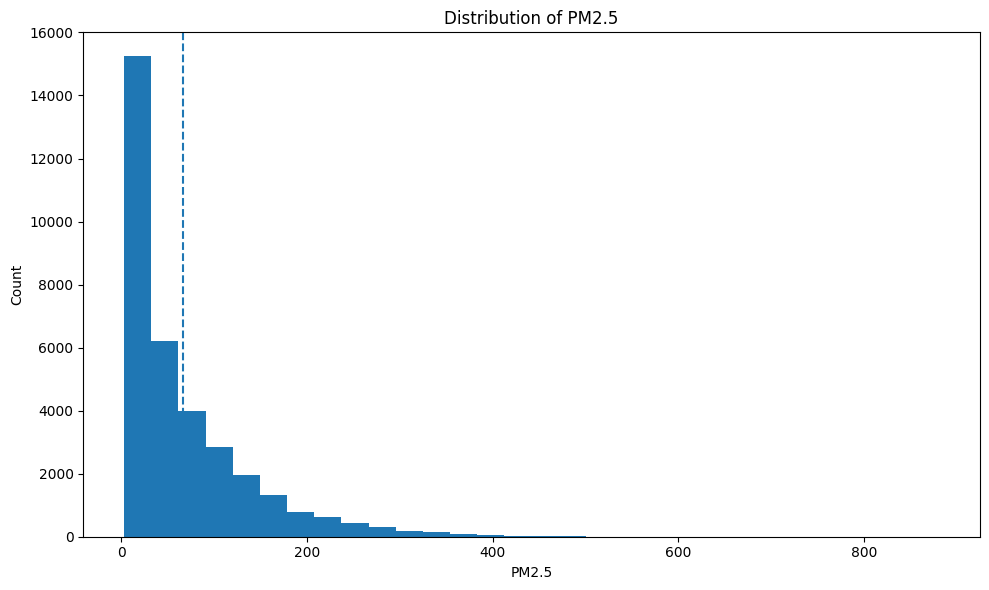

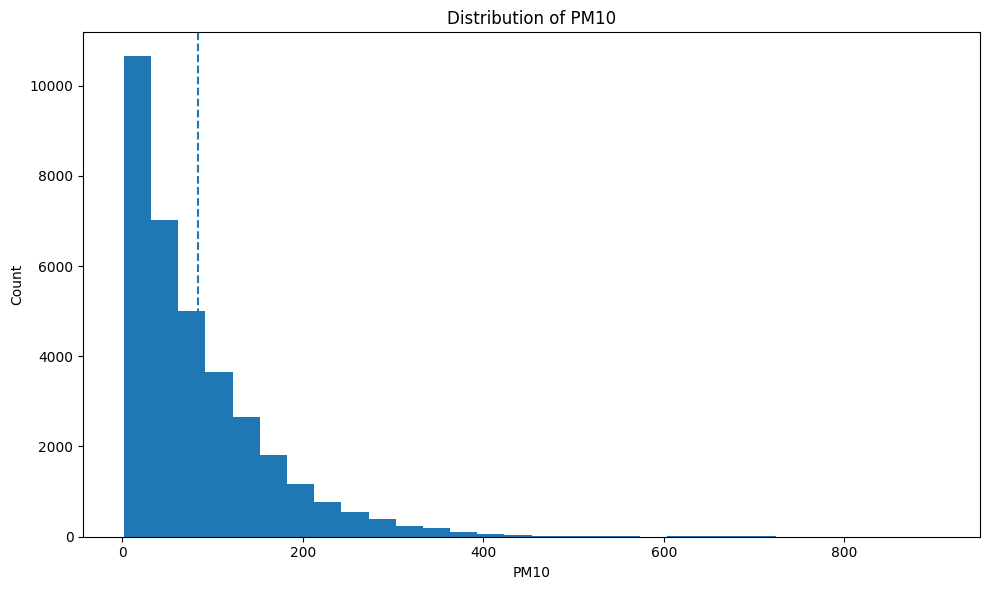

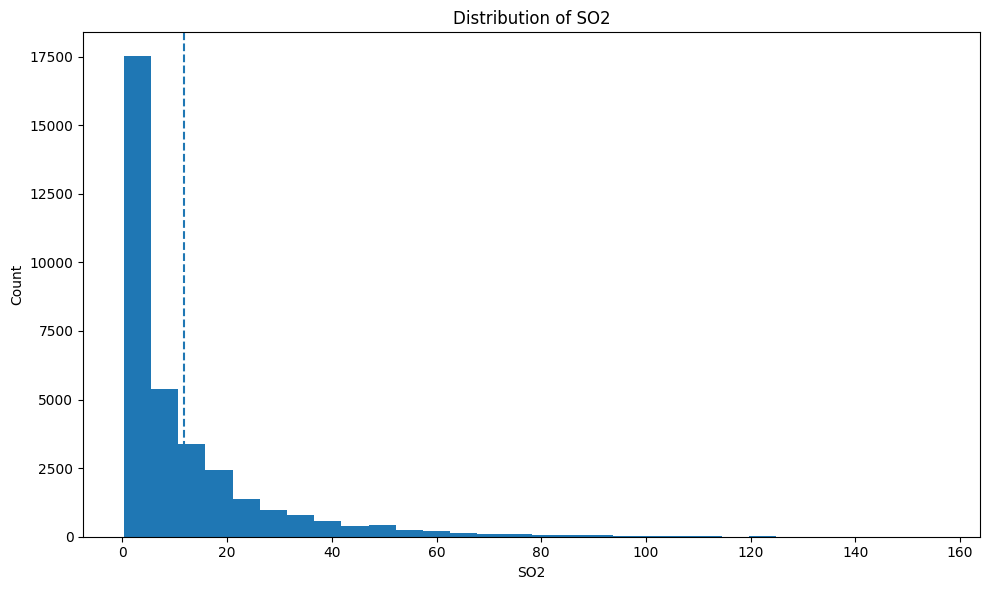

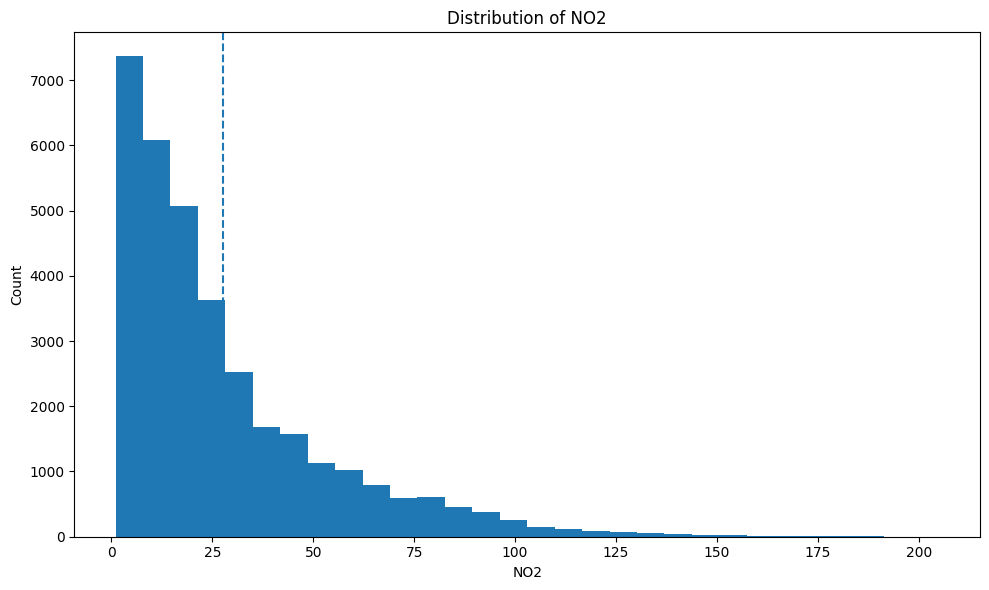

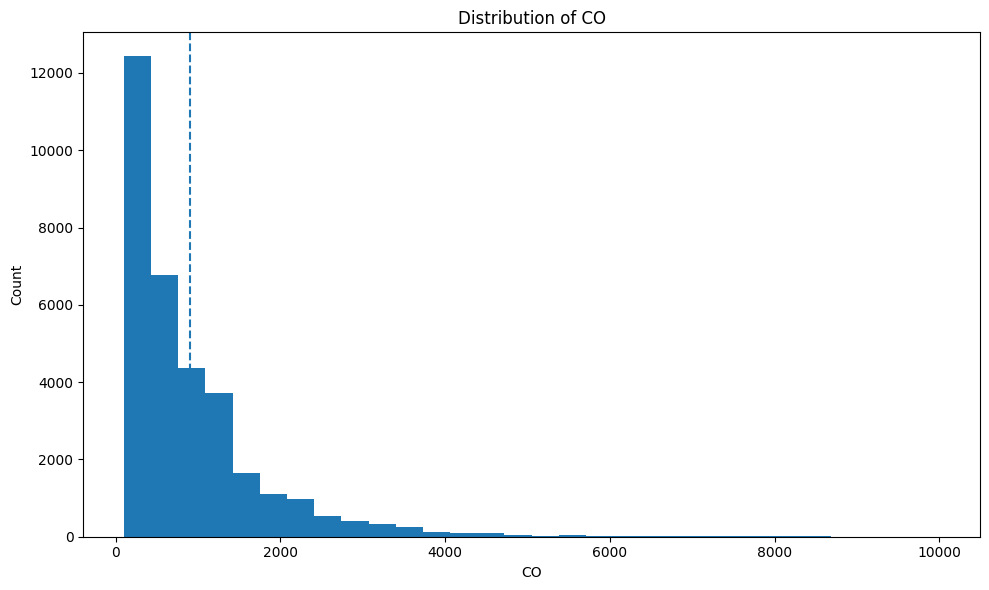

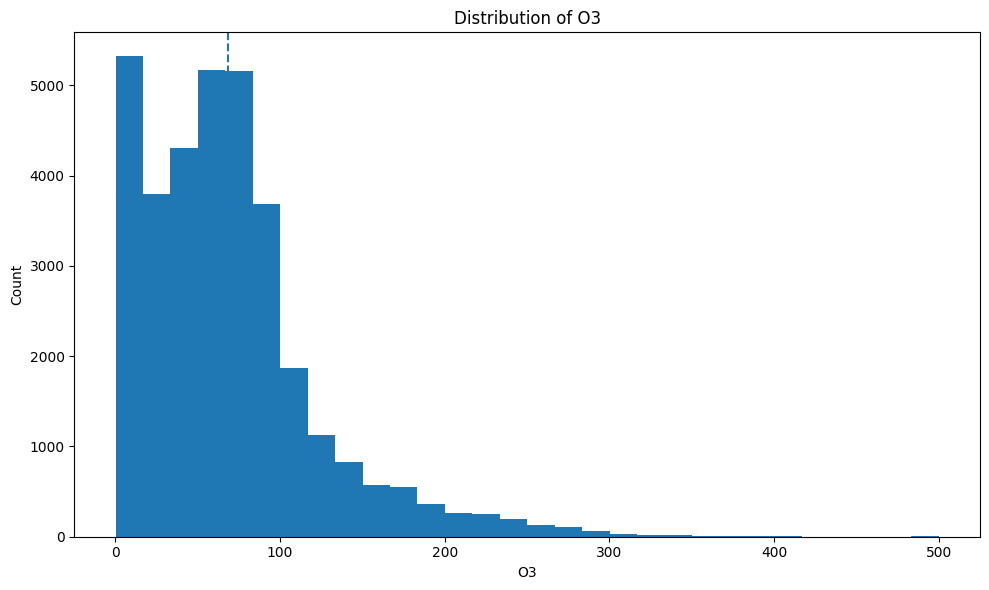

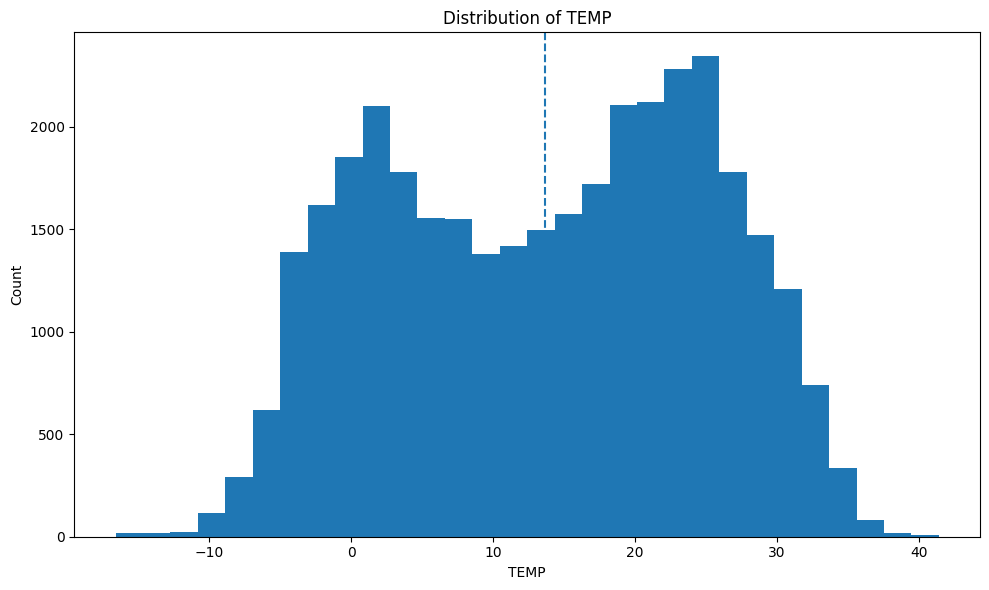

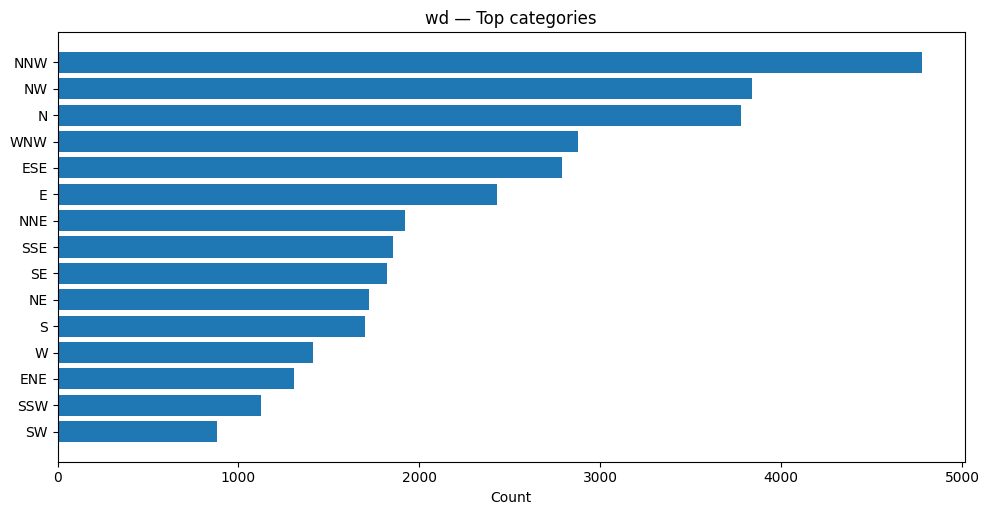

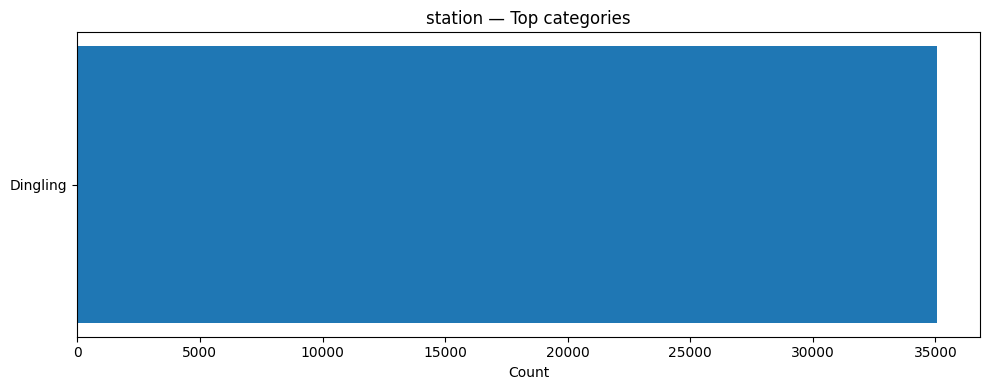

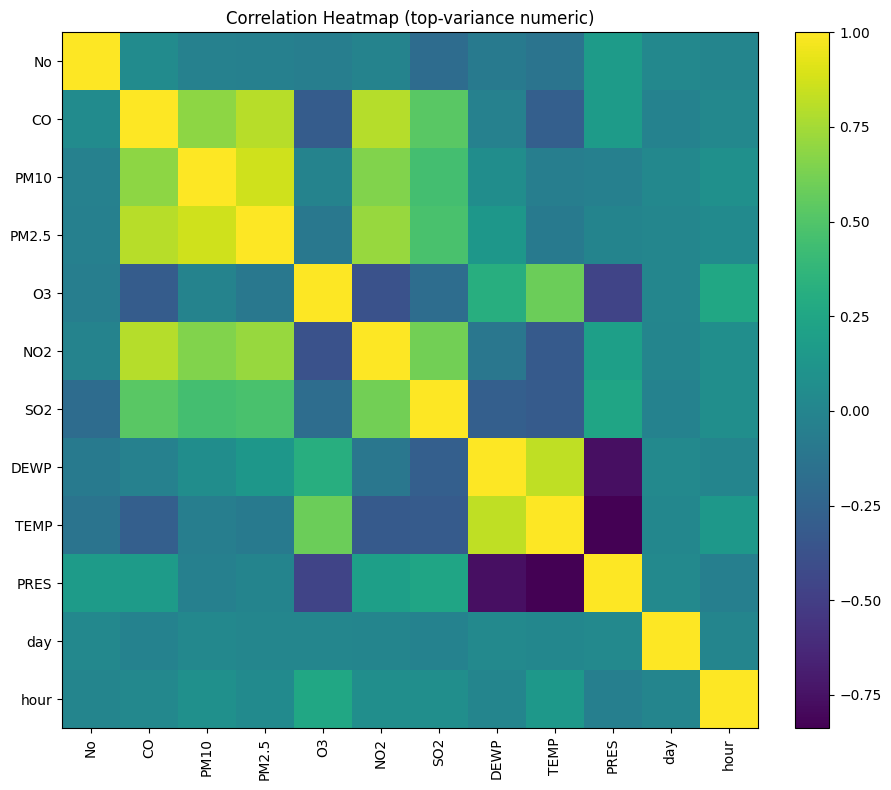

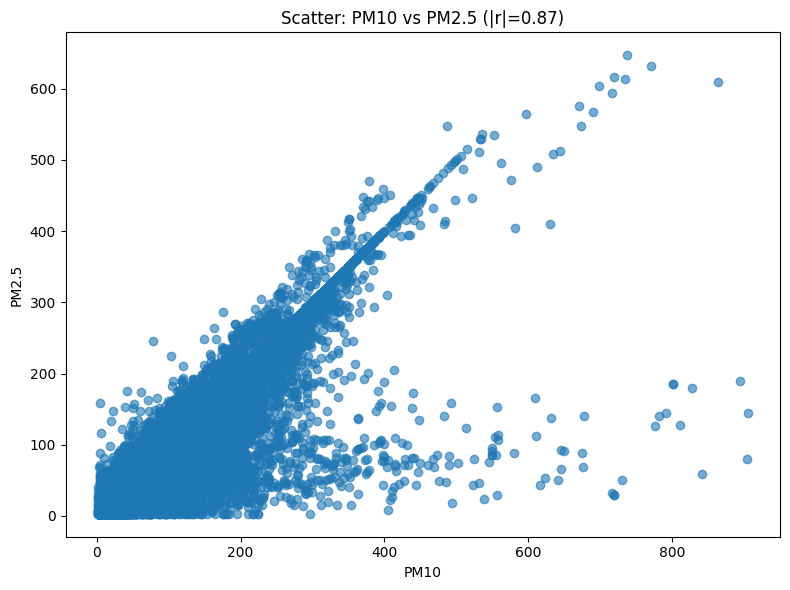

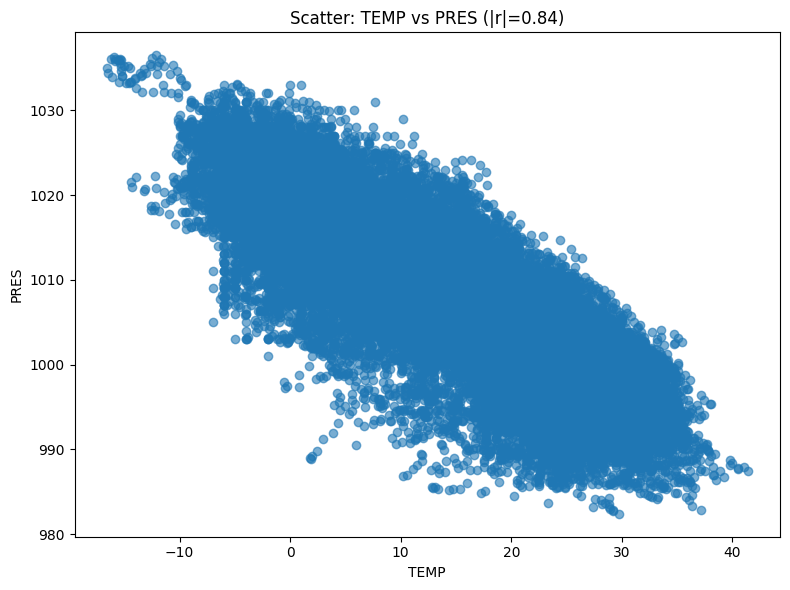

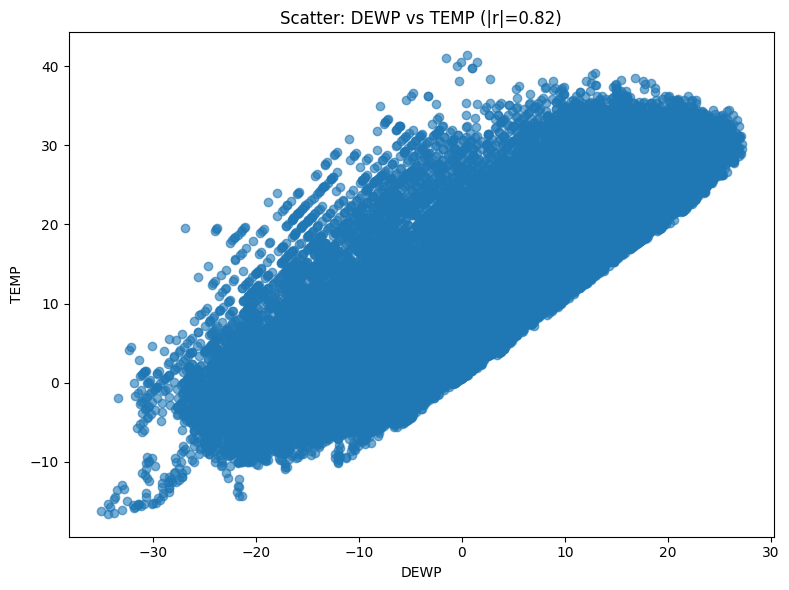

Saved PDF to: /content/EDA_report.pdf


In [ ]:
# === EDA GRAPHS (Matplotlib only) ============================================
# Supports: file upload OR Google Drive path.
# Outputs inline charts and (optionally) a multi-page PDF.

import re, io, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# ---------- USER OPTIONS ----------
USE_UPLOAD = True            # True -> upload a CSV in Colab; False -> read from DRIVE_PATH
DRIVE_PATH = "/content/your_file.csv"   # used if USE_UPLOAD=False
SAVE_PDF   = True
PDF_PATH   = "/content/EDA_report.pdf"

NUMERIC_LIMIT = 12           # histograms for first N numeric cols
CATEGORICAL_LIMIT = 10       # bar charts for first N categoricals
CATEGORICAL_UNIQUE_CAP = 30  # only plot categoricals with <= this many unique values
TOPVAR_CORR_COLS = 12        # heatmap on top-variance numeric columns
TOP_SCATTER_PAIRS = 3        # top |r| pairs to scatter
BOXPLOTS_BY_CAT  = True      # try boxplots by a low-cardinality categorical (<=5 levels)

# WHO daily guideline for PM2.5 (optional)
WHO_DAILY = 15.0

# ---------- LOAD DATA ----------
def read_csv_flexible(path_or_bytes):
    encodings = ["utf-8", "utf-8-sig", "latin-1"]
    last_err = None
    for enc in encodings:
        try:
            if isinstance(path_or_bytes, (bytes, bytearray, io.BytesIO)):
                return pd.read_csv(io.BytesIO(path_or_bytes) if not isinstance(path_or_bytes, io.BytesIO) else path_or_bytes,
                                   encoding=enc)
            else:
                return pd.read_csv(path_or_bytes, encoding=enc)
        except Exception as e:
            last_err = e
    raise RuntimeError(f"Could not read CSV. Last error: {last_err}")

if USE_UPLOAD:
    from google.colab import files
    uploaded = files.upload()
    if not uploaded:
        raise SystemExit("No file uploaded.")
    fname = list(uploaded.keys())[0]
    df = read_csv_flexible(uploaded[fname])
    CSV_NAME = fname
else:
    df = read_csv_flexible(DRIVE_PATH)
    CSV_NAME = os.path.basename(DRIVE_PATH)

n_rows, n_cols = df.shape
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in df.columns if c not in numeric_cols]

# ---------- PDF helper ----------
pp = PdfPages(PDF_PATH) if SAVE_PDF else None
def save_and_show(fig):
    plt.tight_layout()
    if pp is not None:
        pp.savefig(fig)
    plt.show()
    plt.close(fig)

# ---------- Title page ----------
fig = plt.figure(figsize=(11, 8.5))
title = "Exploratory Data Analysis (EDA) Report"
subtitle = f"File: {CSV_NAME}\nRows: {n_rows:,} | Columns: {n_cols:,}"
bullets = (
    "This pack includes:\n"
    "• Missingness overview\n"
    "• Numeric histograms\n"
    "• Categorical bar charts\n"
    "• Correlation heatmap + top scatter pairs\n"
    "• Boxplots by a low-cardinality categorical (if present)\n"
    "• PM2.5 monthly heatmap & exceedance bars (if date & pm2.5 found)"
)
fig.text(0.5, 0.75, title, ha="center", va="center", fontsize=20)
fig.text(0.5, 0.68, subtitle, ha="center", va="center", fontsize=12)
fig.text(0.1, 0.55, bullets, ha="left", va="top", fontsize=11)
plt.axis("off")
save_and_show(fig)

# ---------- Missingness ----------
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
fig = plt.figure(figsize=(11, max(4, 0.25 * len(missing_pct))))
plt.barh(missing_pct.index, missing_pct.values)
plt.xlabel("Missing (%)")
plt.title("Missingness by Column")
save_and_show(fig)

# ---------- Numeric histograms ----------
for col in numeric_cols[:NUMERIC_LIMIT]:
    series = df[col].dropna()
    if series.empty:
        continue
    fig = plt.figure(figsize=(10, 6))
    plt.hist(series, bins=30)
    plt.axvline(series.mean(), linestyle="--")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("Count")
    save_and_show(fig)

# ---------- Categorical bar charts ----------
cats_to_plot = []
for c in categorical_cols:
    nunique = df[c].nunique(dropna=True)
    if nunique <= CATEGORICAL_UNIQUE_CAP:
        cats_to_plot.append(c)
    if len(cats_to_plot) >= CATEGORICAL_LIMIT:
        break

for col in cats_to_plot:
    vc = df[col].astype(str).fillna("NA").value_counts().head(15)
    fig = plt.figure(figsize=(10, max(4, 0.35 * len(vc))))
    plt.barh(vc.index[::-1], vc.values[::-1])
    plt.title(f"{col} — Top categories")
    plt.xlabel("Count")
    save_and_show(fig)

# ---------- Correlation heatmap (top-variance numerics) + top scatter pairs ----------
if len(numeric_cols) >= 2:
    var_series = df[numeric_cols].var(numeric_only=True).sort_values(ascending=False)
    top_var_cols = var_series.index[:TOPVAR_CORR_COLS].tolist()
    corr = df[top_var_cols].corr(numeric_only=True)

    fig = plt.figure(figsize=(10, 8))
    im = plt.imshow(corr.values, interpolation="nearest")
    plt.title("Correlation Heatmap (top-variance numeric)")
    plt.xticks(range(len(top_var_cols)), top_var_cols, rotation=90)
    plt.yticks(range(len(top_var_cols)), top_var_cols)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    save_and_show(fig)

    corr_vals = corr.abs().where(~np.eye(len(corr), dtype=bool))
    pairs = []
    for i in range(len(top_var_cols)):
        for j in range(i + 1, len(top_var_cols)):
            pairs.append((top_var_cols[i], top_var_cols[j], corr_vals.iloc[i, j]))
    pairs = sorted(pairs, key=lambda x: (x[2] if pd.notna(x[2]) else -1), reverse=True)

    for (a, b, r) in pairs[:TOP_SCATTER_PAIRS]:
        clean = df[[a, b]].dropna()
        if not clean.empty:
            fig = plt.figure(figsize=(8, 6))
            plt.scatter(clean[a], clean[b], alpha=0.6)
            plt.title(f"Scatter: {a} vs {b} (|r|={(float(r) if pd.notna(r) else np.nan):.2f})")
            plt.xlabel(a); plt.ylabel(b)
            save_and_show(fig)

# ---------- Boxplots by low-cardinality categorical ----------
if BOXPLOTS_BY_CAT and len(categorical_cols) > 0 and len(numeric_cols) > 0:
    low_card = [c for c in categorical_cols if df[c].nunique(dropna=True) <= 5]
    if len(low_card) > 0:
        cat = low_card[0]
        var_series = df[numeric_cols].var(numeric_only=True).sort_values(ascending=False)
        for col in var_series.index[:3]:
            # build groups
            data, labels = [], []
            for level in sorted(df[cat].dropna().unique()):
                vals = df.loc[df[cat] == level, col].dropna().values
                if len(vals) > 0:
                    data.append(vals); labels.append(str(level))
            if len(data) >= 2:
                fig = plt.figure(figsize=(8, 6))
                plt.boxplot(data, labels=labels, showfliers=False)
                plt.title(f"{col} by {cat}")
                plt.xlabel(cat); plt.ylabel(col)
                save_and_show(fig)

# ---------- Optional PM2.5 Year×Month heatmap + exceedance days ----------
def find_col(cols, patterns):
    for p in patterns:
        for c in cols:
            if re.search(p, c, flags=re.I):
                return c
    return None

dt_col = find_col(df.columns, [r"^date$", r"datetime", r"timestamp", r"time"])
pm_col = find_col(df.columns, [r"pm\s*2\.?5", r"pm2_5", r"pm25"])
city_col = find_col(df.columns, [r"city", r"site", r"station", r"location"])

if dt_col and pm_col:
    df_dt = df.copy()
    df_dt[dt_col] = pd.to_datetime(df_dt[dt_col], errors="coerce")
    df_dt = df_dt.dropna(subset=[dt_col, pm_col])
    # Optional: filter to Lahore if a city/station column exists
    if city_col is not None:
        mask_lhr = df_dt[city_col].astype(str).str.contains("lah", case=False, na=False)
        if mask_lhr.any():
            df_dt = df_dt[mask_lhr]

    df_dt = df_dt[df_dt[pm_col] >= 0]
    daily = (df_dt.set_index(df_dt[dt_col]).sort_index()
             .resample("D")[pm_col].mean().to_frame("pm25").dropna())
    if not daily.empty:
        daily["year"] = daily.index.year
        daily["month"] = daily.index.month

        # Heatmap table (rows=months, cols=years)
        monthly = (daily.groupby(["month", "year"])["pm25"].mean().unstack("year"))
        vals = monthly.values.astype(float)
        masked = np.ma.masked_invalid(vals)

        fig = plt.figure(figsize=(10, 6))
        im = plt.imshow(masked, aspect="auto", interpolation="nearest", origin="upper")
        plt.xticks(range(len(monthly.columns)), monthly.columns.astype(str))
        plt.yticks(range(12), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
        plt.title("PM2.5 — Monthly Mean by Year")
        plt.xlabel("Year"); plt.ylabel("Month")
        cb = plt.colorbar(im); cb.set_label("PM2.5 (µg/m³)")
        save_and_show(fig)

        # Exceedance days over WHO daily guideline (bar)
        yearly_exc = (daily.assign(exceed=lambda x: x["pm25"] > WHO_DAILY)
                            .groupby("year")["exceed"].sum())
        if not yearly_exc.empty:
            fig = plt.figure(figsize=(9,6))
            plt.bar(yearly_exc.index.astype(str), yearly_exc.values)
            plt.title(f"Days > {WHO_DAILY} µg/m³ (WHO daily) by Year")
            plt.xlabel("Year"); plt.ylabel("Days")
            save_and_show(fig)

# ---------- Close PDF ----------
if pp is not None:
    pp.close()
    print(f"Saved PDF to: {PDF_PATH}")


In [23]:
df_diff = df["PM2.5"].ffill()

#Autoregressive

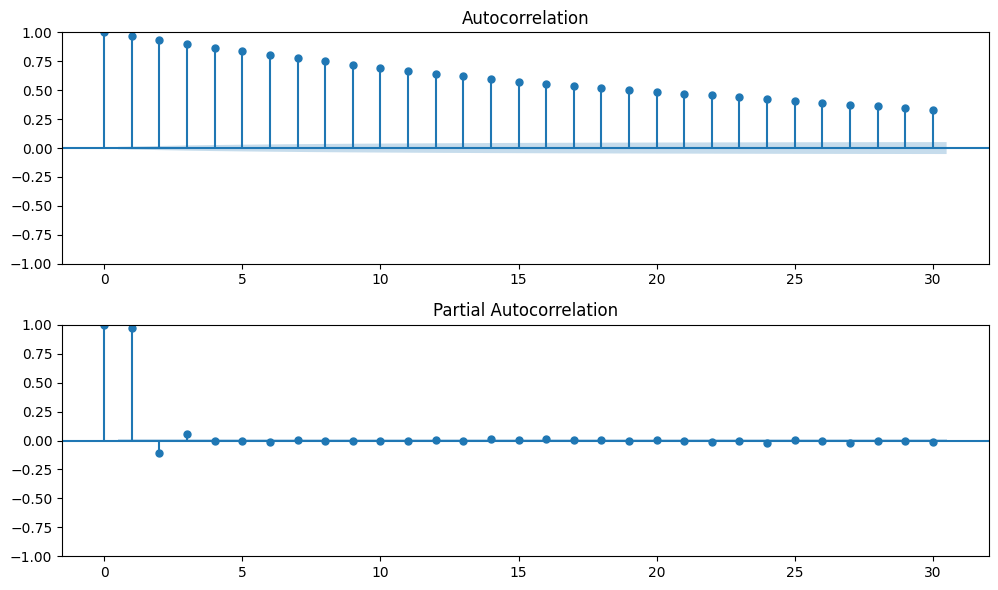

In [24]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
plot_acf(df_diff, lags=30, ax=ax[0])
plot_pacf(df_diff, lags=30, ax=ax[1])
plt.tight_layout()
plt.show()

In [25]:
n = len(df_diff)
train_end = int(n * 0.8)
train = df_diff.iloc[:train_end]
test = df_diff.iloc[train_end:]

In [26]:
p = 13
model = AutoReg(train, lags=p, old_names=False)
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                  PM2.5   No. Observations:                28051
Model:                    AutoReg(13)   Log Likelihood             -122147.395
Method:               Conditional MLE   S.D. of innovations             18.870
Date:                Thu, 30 Oct 2025   AIC                         244324.791
Time:                        03:47:21   BIC                         244448.410
Sample:                            13   HQIC                        244364.583
                                28051                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3781      0.160     14.887      0.000       2.065       2.691
PM2.5.L1       1.0675      0.006    178.750      0.000       1.056       1.079
PM2.5.L2      -0.1669      0.009    -19.101      0.0

In [27]:
pred_train = model_fit.predict(start=train.index[p], end=train.index[-1], dynamic=False)
pred_test = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

In [28]:
rmse = np.sqrt(mean_squared_error(test, pred_test))
mae = mean_absolute_error(test, pred_test)
print(rmse, mae,sep="\n")

74.58270775412082
53.49654190714791


In [41]:
# --- Minimal ARIMA for PM2.5 ---
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = aq_df

# 1) prepare series (edit col names)
time_col  = 'year_month_day_hour'
value_col = 'PM2.5'


s = (df.assign(**{time_col: pd.to_datetime(df[time_col])})
       .set_index(time_col)
       .sort_index()[value_col]
       .astype(float)
       .asfreq('H')                    # assume hourly; change to 'D' for daily
       .interpolate('time'))

# 2) split
n_test = max(int(0.2*len(s)), 24)
train, test = s.iloc[:-n_test], s.iloc[-n_test:]

# 3) ARIMA(p,d,q)
p,d,q = 1,1,1
model = ARIMA(train, order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

# 4) forecast exactly len(test) steps + align index
pred_test = model_fit.forecast(steps=len(test))
pred_test.index = test.index

# 5) quick metrics (optional)

mae  = mean_absolute_error(test, pred_test)
print(f"RMSE: {rmse:.3f} | MAE: {mae:.3f}")


                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                28052
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -121684.555
Date:                Thu, 30 Oct 2025   AIC                         243375.109
Time:                        04:04:52   BIC                         243399.834
Sample:                    03-01-2013   HQIC                        243383.068
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3778      0.011    -34.706      0.000      -0.399      -0.356
ma.L1          0.4830      0.010     46.561      0.000       0.463       0.503
sigma2       343.1978      0.275   1247.369      0.0

In [1]:
# --- SARIMA for PM2.5 (simple & robust) ---
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = aq_df

# 1) prepare series (edit col names)
time_col  = 'year_month_day_hour'
value_col = 'PM2.5'

s = (df.assign(**{time_col: pd.to_datetime(df[time_col])})
       .set_index(time_col)
       .sort_index()[value_col]
       .astype(float))

# assume hourly data; change to 'D' for daily
s = s.asfreq('H').interpolate('time')

# 2) split train/test
n_test = max(int(0.2*len(s)), 24)
train, test = s.iloc[:-n_test], s.iloc[-n_test:]

# 3) SARIMA orders (hourly with daily seasonality m=24; change m if needed)
p,d,q   = 1,1,1
P,D,Q,m = 1,1,1,24

model = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,m),
                enforce_stationarity=False, enforce_invertibility=False)
fit = model.fit(disp=False)
print(fit.summary())

# 4) forecast exactly the test length (avoids off-by-one)
pred_test = fit.forecast(steps=len(test))
pred_test.index = test.index

# 5) quick metrics + plot

mae  = mean_absolute_error(test, pred_test)
print(f"RMSE: {rmse:.3f} | MAE: {mae:.3f}")

plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index,  test,  label='Test')
plt.plot(pred_test.index, pred_test, label=f'SARIMA ({p,d,q})x({P,D,Q},{m})')
plt.legend(); plt.title('PM2.5 — SARIMA Backtest'); plt.tight_layout(); plt.show()

# 6) (optional) refit on all data and forecast h steps ahead
h = 48  # change as you like
final = SARIMAX(s, order=(p,d,q), seasonal_order=(P,D,Q,m),
                enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
future = final.forecast(steps=h)
print(future.head())



NameError: name 'aq_df' is not defined